In [ ]:
# LSTM구조
# LSTM에는 순환되는 상태가 2개 이다. 은닉상태말고 나머지를 셀 상태라고 부른다.
# 은닉상태와 달리 셀상태는 다음 층으로 전달 되지 않고, LSTM셀에서만 순환되는 값이다.

In [1]:
# LSTM 신경망 훈련하기
# 훈련데이터&검증데이터 분리
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
# 각 샘플의 길이를 100에 맞추고, 부족시 패딩
# input -> seq 데이터로 변환
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
# SimpleRNN Class -> LSTM Class로 변환
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
# simpleRNN 클래스의 파라미터개수는 200개, LSTM셀은 4개가 있고 4배가 늘어 800개가 됨.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 85ms/step - loss: 0.6926 - accuracy: 0.5415 - val_loss: 0.6920 - val_accuracy: 0.5618
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 33s 104ms/step - loss: 0.6914 - accuracy: 0.5770 - val_loss: 0.6904 - val_accuracy: 0.5882
Epoch 3/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6889 - accuracy: 0.6116 - val_loss: 0.6867 - val_accuracy: 0.6246
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6800 - accuracy: 0.6592 - val_loss: 0.6671 - val_accuracy: 0.6964
Epoch 5/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6377 - accuracy: 0.7014 - val_loss: 0.6204 - val_accuracy: 0.6986
Epoch 6/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6057 - accuracy: 0.7077 - val_loss: 0.5964 - val_accuracy: 0.7160
Epoch 7/100
313/313 [==============================] - 29s 93ms/step - loss: 0.5798 - accuracy: 0.7325 - val_loss: 0.5733 - val_accuracy: 0.7302
Epoch 8/100
313/313 [==============================] - 22s 71ms/step - loss: 0.5550 - accuracy: 0.7515 - val_loss: 0.5510 - val_accuracy: 0.7

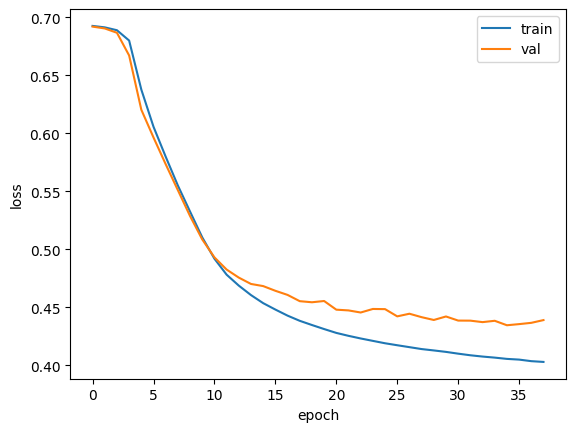

In [10]:
#시각화
import matplotlib.pyplot as plt
plt.plot (history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
# 순환층에 드롭아웃 적용하기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
# 동일조건 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 51ms/step - loss: 0.6926 - accuracy: 0.5253 - val_loss: 0.6917 - val_accuracy: 0.5576
Epoch 2/100
  3/313 [..............................] - ETA: 12s - loss: 0.6926 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 16s 50ms/step - loss: 0.6902 - accuracy: 0.5824 - val_loss: 0.6884 - val_accuracy: 0.6198
Epoch 3/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6839 - accuracy: 0.6370 - val_loss: 0.6764 - val_accuracy: 0.6678
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6490 - accuracy: 0.6823 - val_loss: 0.6117 - val_accuracy: 0.6964
Epoch 5/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6008 - accuracy: 0.6962 - val_loss: 0.5809 - val_accuracy: 0.7218
Epoch 6/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5728 - accuracy: 0.7214 - val_loss: 0.5558 - val_accuracy: 0.7490
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5481 - accuracy: 0.7397 - val_loss: 0.5321 - val_accuracy: 0.7598
Epoch 8/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5251 - accuracy: 0.7591 - val_loss: 0.5137 - val_accuracy: 0.76

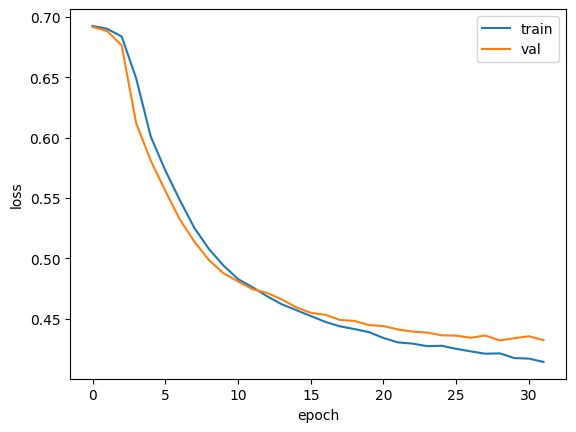

In [13]:
#시각화
import matplotlib.pyplot as plt
plt.plot (history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 2개층을 연결해보기
# 주의할점은 순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은닉상태만 다음 층으로 전달한다. 하지만 순환층을 쌓게 되면, 모든 순환층에 순차 데이터가 필요하다.
# 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 한다. 오직 마지막 순환층만 마지막 타임스텝의 은닉상태를 출력해야한다.
# 순환층에서 모든 타임스텝의 은닉상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True 해주면 된다.

In [14]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 36s 99ms/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6930 - val_accuracy: 0.5194
Epoch 2/100
313/313 [==============================] - 30s 97ms/step - loss: 0.6928 - accuracy: 0.5316 - val_loss: 0.6924 - val_accuracy: 0.5930
Epoch 3/100
313/313 [==============================] - 30s 96ms/step - loss: 0.6913 - accuracy: 0.5835 - val_loss: 0.6890 - val_accuracy: 0.6104
Epoch 4/100
313/313 [==============================] - 30s 95ms/step - loss: 0.6733 - accuracy: 0.6295 - val_loss: 0.6455 - val_accuracy: 0.6802
Epoch 5/100
313/313 [==============================] - 29s 93ms/step - loss: 0.6249 - accuracy: 0.6860 - val_loss: 0.6040 - val_accuracy: 0.7052
Epoch 6/100
313/313 [==============================] - 30s 96ms/step - loss: 0.5868 - accuracy: 0.7186 - val_loss: 0.5700 - val_accuracy: 0.7320
Epoch 7/100
313/313 [==============================] - 31s 98ms/step - loss: 0.5570 - accuracy: 0.7416 - val_loss: 0.5416 - val_ac

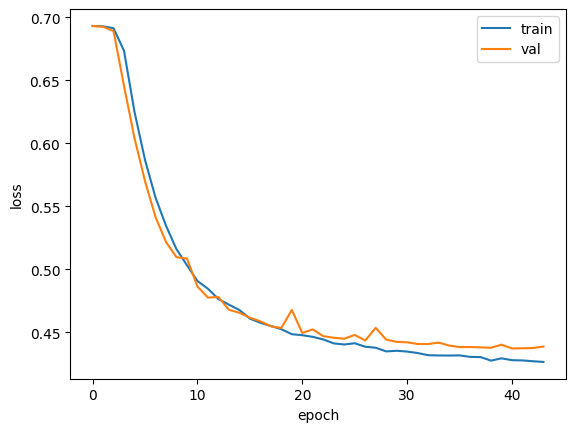

In [17]:
#시각화
import matplotlib.pyplot as plt
plt.plot (history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# GRU 구조 Gated Recurrent Unit 으로 LSTM을 간소화한 버전이다.

In [18]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 55ms/step - loss: 0.6926 - accuracy: 0.5218 - val_loss: 0.6920 - val_accuracy: 0.5466
Epoch 2/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6912 - accuracy: 0.5559 - val_loss: 0.6908 - val_accuracy: 0.5456
Epoch 3/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6895 - accuracy: 0.5671 - val_loss: 0.6890 - val_accuracy: 0.5532
Epoch 4/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6871 - accuracy: 0.5762 - val_loss: 0.6866 - val_accuracy: 0.5718
Epoch 5/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6839 - accuracy: 0.5885 - val_loss: 0.6833 - val_accuracy: 0.5748
Epoch 6/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6794 - accuracy: 0.5956 - val_loss: 0.6788 - val_accuracy: 0.5822
Epoch 7/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6733 - accuracy: 0.6096 - val_loss: 0.6724 - val_ac

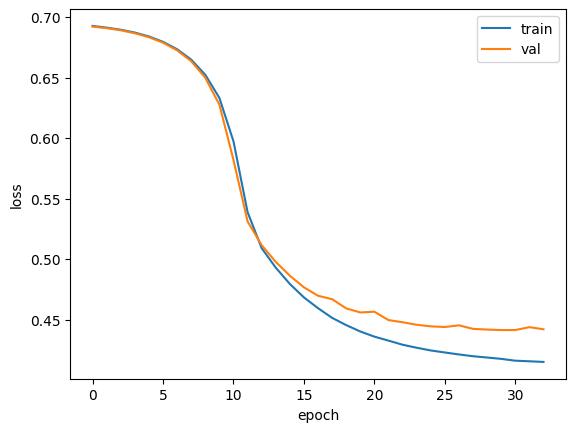

In [20]:
#시각화
import matplotlib.pyplot as plt
plt.plot (history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()